In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn import model_selection

import datetime

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv(r"C:\Users\Divik\Desktop\rossmann-store-sales\train.csv")

In [3]:
df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
df_train.shape

(1017209, 9)

In [5]:
df_train.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [6]:
df_train['DayOfWeek'].value_counts()

5    145845
4    145845
3    145665
2    145664
7    144730
6    144730
1    144730
Name: DayOfWeek, dtype: int64

In [7]:
len(df_train['Store'].unique())

1115

In [8]:
print('Open:\n', df_train['Open'].value_counts(), '\n\n')
print('Promo\n', df_train['Promo'].value_counts(), '\n\n')
print('State Holiday\n', df_train['StateHoliday'].value_counts(), '\n\n')
print('School Holiday\n', df_train['SchoolHoliday'].value_counts())

Open:
 1    844392
0    172817
Name: Open, dtype: int64 


Promo
 0    629129
1    388080
Name: Promo, dtype: int64 


State Holiday
 0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64 


School Holiday
 0    835488
1    181721
Name: SchoolHoliday, dtype: int64


In [9]:
df_train[df_train['StateHoliday'] == 0]['StateHoliday'].value_counts()

0    131072
Name: StateHoliday, dtype: int64

In [10]:
df_train[df_train['StateHoliday'] == '0']['StateHoliday'].value_counts()

0    855087
Name: StateHoliday, dtype: int64

In [11]:
df_train['StateHoliday'] = df_train['StateHoliday'].apply(lambda x: 0 if x == '0' else x)
df_train['StateHoliday'].value_counts()

0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [13]:
df_store = pd.read_csv(r"C:\Users\Himanshu\Desktop\rossmann-store-sales\store.csv")
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [14]:
df_store.shape

(1115, 10)

In [15]:
df_store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [16]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [17]:
df_store['StoreType'].value_counts()

a    602
d    348
c    148
b     17
Name: StoreType, dtype: int64

In [18]:
df_store['Assortment'].value_counts()

a    593
c    513
b      9
Name: Assortment, dtype: int64

In [19]:
df_store['StoreType'] = df_store['StoreType'].apply(lambda x: 1 if x == 'a' else (2 if x == 'b' else (3 if x == 'c' else 4)))
df_store['StoreType'].value_counts()

1    602
4    348
3    148
2     17
Name: StoreType, dtype: int64

In [20]:
df_store['Assortment'] = df_store['Assortment'].apply(lambda x: 1 if x == 'a' else (2 if x == 'b' else 3))
df_store['Assortment'].value_counts()

1    593
3    513
2      9
Name: Assortment, dtype: int64

In [21]:
max(df_store['CompetitionDistance'])

75860.0

In [22]:
df_store['CompetitionDistance'] = df_store['CompetitionDistance'].fillna(max(df_store['CompetitionDistance']))
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   int64  
 2   Assortment                 1115 non-null   int64  
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(4), object(1)
memory usage: 87.2+ KB


In [23]:
def mapping(features):
    for feature in features:
        temp_dict = {}
        temp_dict = pd.Series(df_store[feature].values, index = df_store['Store']).to_dict()
        df_train[feature] = df_train['Store'].map(temp_dict)

In [24]:
mapping(['StoreType', 'Assortment', 'CompetitionDistance'])

In [25]:
df_train[df_train['Store'] == 1].head(10)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance
0,1,5,2015-07-31,5263,555,1,1,0,1,3,1,1270.0
1115,1,4,2015-07-30,5020,546,1,1,0,1,3,1,1270.0
2230,1,3,2015-07-29,4782,523,1,1,0,1,3,1,1270.0
3345,1,2,2015-07-28,5011,560,1,1,0,1,3,1,1270.0
4460,1,1,2015-07-27,6102,612,1,1,0,1,3,1,1270.0
5575,1,7,2015-07-26,0,0,0,0,0,0,3,1,1270.0
6690,1,6,2015-07-25,4364,500,1,0,0,0,3,1,1270.0
7805,1,5,2015-07-24,3706,459,1,0,0,0,3,1,1270.0
8920,1,4,2015-07-23,3769,503,1,0,0,0,3,1,1270.0
10035,1,3,2015-07-22,3464,463,1,0,0,0,3,1,1270.0


In [26]:
df_train[df_train['Sales'] == 0]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance
291,292,5,2015-07-31,0,0,0,1,0,1,1,1,1100.0
875,876,5,2015-07-31,0,0,0,1,0,1,1,1,21790.0
1406,292,4,2015-07-30,0,0,0,1,0,1,1,1,1100.0
1990,876,4,2015-07-30,0,0,0,1,0,1,1,1,21790.0
2521,292,3,2015-07-29,0,0,0,1,0,1,1,1,1100.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,1,1,1900.0
1017205,1112,2,2013-01-01,0,0,0,0,a,1,3,3,1880.0
1017206,1113,2,2013-01-01,0,0,0,0,a,1,1,3,9260.0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,1,3,870.0


In [27]:
df_train[df_train['Open'] == 0]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance
291,292,5,2015-07-31,0,0,0,1,0,1,1,1,1100.0
875,876,5,2015-07-31,0,0,0,1,0,1,1,1,21790.0
1406,292,4,2015-07-30,0,0,0,1,0,1,1,1,1100.0
1990,876,4,2015-07-30,0,0,0,1,0,1,1,1,21790.0
2521,292,3,2015-07-29,0,0,0,1,0,1,1,1,1100.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,1,1,1900.0
1017205,1112,2,2013-01-01,0,0,0,0,a,1,3,3,1880.0
1017206,1113,2,2013-01-01,0,0,0,0,a,1,1,3,9260.0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,1,3,870.0


In [28]:
df_train[df_train['Open'] == 0]['Sales'].value_counts()


0    172817
Name: Sales, dtype: int64

In [29]:
df_train = df_train[df_train['Open'] == 1]
df_train.shape

(844392, 12)

In [30]:
df_train['Open'].value_counts()

1    844392
Name: Open, dtype: int64

In [31]:
df_train.drop('Open', inplace = True, axis = 1)
df_train.shape

(844392, 11)

In [32]:
print('Promo\n', df_train['Promo'].value_counts(), '\n\n')
print('State Holiday\n', df_train['StateHoliday'].value_counts(), '\n\n')
print('School Holiday\n', df_train['SchoolHoliday'].value_counts())

Promo
 0    467496
1    376896
Name: Promo, dtype: int64 


State Holiday
 0    843482
a       694
b       145
c        71
Name: StateHoliday, dtype: int64 


School Holiday
 0    680935
1    163457
Name: SchoolHoliday, dtype: int64


In [33]:
df_train['StateHoliday'] = df_train['StateHoliday'].apply(lambda x: 1 if x == 'a' else (2 if x == 'b' else (3 if x == 'c' else x)))
df_train['StateHoliday'].value_counts()

0    843482
1       694
2       145
3        71
Name: StateHoliday, dtype: int64

In [34]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 1017190
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Store                844392 non-null  int64  
 1   DayOfWeek            844392 non-null  int64  
 2   Date                 844392 non-null  object 
 3   Sales                844392 non-null  int64  
 4   Customers            844392 non-null  int64  
 5   Promo                844392 non-null  int64  
 6   StateHoliday         844392 non-null  int64  
 7   SchoolHoliday        844392 non-null  int64  
 8   StoreType            844392 non-null  int64  
 9   Assortment           844392 non-null  int64  
 10  CompetitionDistance  844392 non-null  float64
dtypes: float64(1), int64(9), object(1)
memory usage: 77.3+ MB


In [35]:
df_train['DayOfYear'] = df_train['Date'].map(lambda x: datetime.datetime.strptime(str(x),'%Y-%m-%d').timetuple().tm_yday)
df_train.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,DayOfYear
0,1,5,2015-07-31,5263,555,1,0,1,3,1,1270.0,212
1,2,5,2015-07-31,6064,625,1,0,1,1,1,570.0,212
2,3,5,2015-07-31,8314,821,1,0,1,1,1,14130.0,212
3,4,5,2015-07-31,13995,1498,1,0,1,3,3,620.0,212
4,5,5,2015-07-31,4822,559,1,0,1,1,1,29910.0,212
5,6,5,2015-07-31,5651,589,1,0,1,1,1,310.0,212
6,7,5,2015-07-31,15344,1414,1,0,1,1,3,24000.0,212
7,8,5,2015-07-31,8492,833,1,0,1,1,1,7520.0,212
8,9,5,2015-07-31,8565,687,1,0,1,1,3,2030.0,212
9,10,5,2015-07-31,7185,681,1,0,1,1,1,3160.0,212


In [36]:
df_train['Date'] = pd.to_datetime(df_train['Date'], format = '%Y-%m-%d')

In [37]:
df_train['Year'] = df_train['Date'].map(lambda x: x.year)
df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,DayOfYear,Year
0,1,5,2015-07-31,5263,555,1,0,1,3,1,1270.0,212,2015
1,2,5,2015-07-31,6064,625,1,0,1,1,1,570.0,212,2015
2,3,5,2015-07-31,8314,821,1,0,1,1,1,14130.0,212,2015
3,4,5,2015-07-31,13995,1498,1,0,1,3,3,620.0,212,2015
4,5,5,2015-07-31,4822,559,1,0,1,1,1,29910.0,212,2015


In [38]:
df_train.drop('Date', inplace = True, axis = 1)
df_train.drop('Customers', inplace = True, axis = 1)
df_train.shape

(844392, 11)

In [39]:
df_train.head()

,Store,DayOfWeek,Sales,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,DayOfYear,Year
0,1,5,5263,1,0,1,3,1,1270.0,212,2015
1,2,5,6064,1,0,1,1,1,570.0,212,2015
2,3,5,8314,1,0,1,1,1,14130.0,212,2015
3,4,5,13995,1,0,1,3,3,620.0,212,2015
4,5,5,4822,1,0,1,1,1,29910.0,212,2015


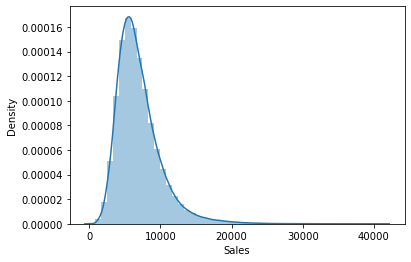

In [40]:
sns.distplot(df_train['Sales'])
plt.show()

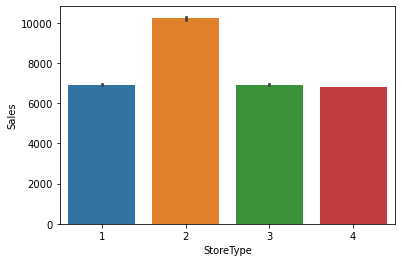

In [41]:
sns.barplot(x = df_train['StoreType'], y = df_train['Sales'])
plt.show()

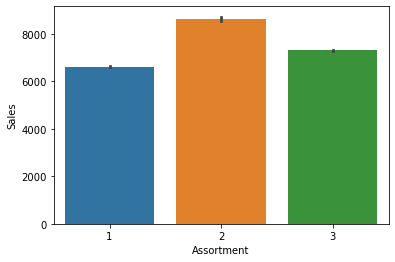

In [42]:
sns.barplot(x = df_train['Assortment'], y = df_train['Sales'])
plt.show()

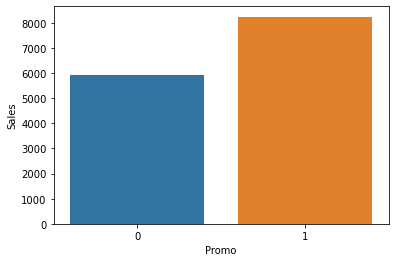

In [43]:
sns.barplot(x = df_train['Promo'], y = df_train['Sales'])
plt.show()

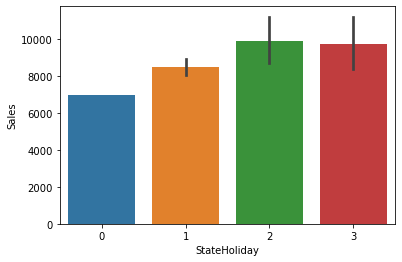

In [44]:
sns.barplot(x = df_train['StateHoliday'], y = df_train['Sales'])
plt.show()

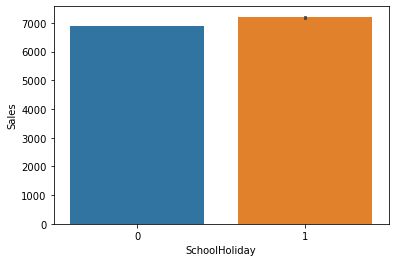

In [45]:
sns.barplot(x = df_train['SchoolHoliday'], y = df_train['Sales'])
plt.show()

In [46]:
df_train.sample()

,Store,DayOfWeek,Sales,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,DayOfYear,Year
43136,767,2,4751,0,0,0,1,3,13080.0,174,2015


In [47]:
X = df_train.drop('Sales', axis = 1)
y = df_train['Sales']

In [48]:
X.shape, y.shape

((844392, 10), (844392,))

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1, random_state = 53)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state = 53)

In [50]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape

((683956, 10), (683956,), (84440, 10), (84440,), (75996, 10), (75996,))

In [51]:
scaler = preprocessing.StandardScaler()

In [52]:
X_train_scalled = scaler.fit_transform(X_train)

X_val_scalled = scaler.transform(X_val)

X_test_scalled = scaler.transform(X_test)

In [ ]:
y_val_pred=dt_model.predict(X_val_scalled)

In [ ]:
rms_dt = np.sqrt(mean_squared_error(y_val_pred,y_val))

In [ ]:
r2_dt = r2_score(y_val, y_pred_dtone)
print('RMSE of Decision Tree Regression:',rms_dt)
print('R-Squared value:',r2_dt)
R2 = r2_score(y_val, y_pred)
n = X_train.shape[0]
p = len(X_train.columns)
Adj_r2 = 1-(1-R2)*(n-1)/(n-p-1)
print('Adjusted R-Square is : ',Adj_r2)

In [53]:
linreg = LinearRegression()

In [54]:
linreg.fit(X_train_scalled, y_train)

LinearRegression()

In [55]:
y_val_pred = linreg.predict(X_val_scalled)

In [56]:
y_train_pred = linreg.predict(X_train_scalled)

In [57]:
data = pd.DataFrame({'Actual':y_val, 'Predicted':y_val_pred})
data

,Actual,Predicted
141654,3218,5459.431774
952135,5758,4718.938466
380424,5644,8773.411857
416536,4325,5727.853061
88184,8414,5407.733539
...,...,...
1014119,4197,5748.874580
114612,4433,6232.061295
819581,13833,6132.476595
333731,4690,8170.745708


In [58]:
r2_score(y_val, y_val_pred)

0.16538221270005993

In [59]:
r2_score(y_train, y_train_pred)

0.16623519336657122

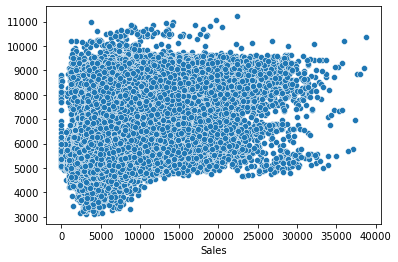

In [60]:
sns.scatterplot(x = y_train, y = y_train_pred)
plt.show()

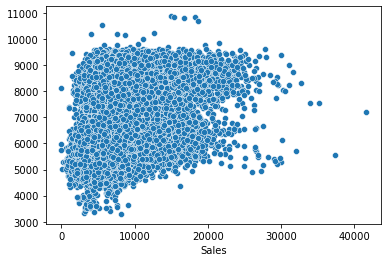

In [61]:
sns.scatterplot(x = y_val, y = y_val_pred)
plt.show()

In [62]:
mae = metrics.mean_absolute_error(y_val, y_val_pred)

mse = metrics.mean_squared_error(y_val, y_val_pred)

rmse = np.sqrt(metrics.mean_absolute_error(y_val, y_val_pred))

print("Mean Absolute Error")
print(mae)
print()

print("Mean Squared Error")
print(mse)
print()

print("Root Mean Squared Error")
print(rmse)

Mean Absolute Error
2060.7477740549825

Mean Squared Error
8092869.091741089

Root Mean Squared Error
45.395459839668796


In [63]:
evaluation = pd.DataFrame()

In [64]:
def evaluation_df(method, mae, mse, rmse, evaluation):
    temp_evaluation = pd.DataFrame({'Method':[method], 'MAE': [mae], 'MSE': [mse], 'RMSE': [rmse]})
    evaluation = pd.concat([evaluation, temp_evaluation])
    evaluation = evaluation[['Method', 'MAE', 'MSE', 'RMSE']]
    return evaluation

In [65]:
evaluation = evaluation_df('Linear Regression', mae, mse, rmse, evaluation)


In [66]:
evaluation


,Method,MAE,MSE,RMSE
0,Linear Regression,2060.747774,8.092869e+06,45.39546


Text(0.5, 0, 'Errors')

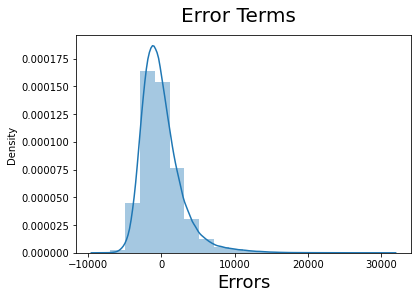

In [67]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)


Text(0.5, 0, 'Errors')

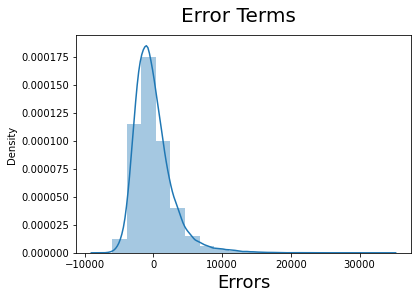

In [68]:
fig = plt.figure()
sns.distplot((y_val - y_val_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

In [69]:
!pip install xgboost

In [70]:
%%time
xgbreg = xgb.XGBRegressor()
xgbreg.fit(X_train_scalled, y_train)

Wall time: 51.7 s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [71]:
xgbreg.score(X_train_scalled, y_train)

0.8432909117224034

In [72]:
y_train_pred = xgbreg.predict(X_train_scalled)

In [73]:
r2_score(y_train, y_train_pred)

0.8432909117224034

In [74]:
y_val_pred = xgbreg.predict(X_val_scalled)

In [75]:
r2_score(y_val, y_val_pred)

0.8405633691140197

In [76]:
mae = metrics.mean_absolute_error(y_val, y_val_pred)

mse = metrics.mean_squared_error(y_val, y_val_pred)

rmse = np.sqrt(metrics.mean_absolute_error(y_val, y_val_pred))

print("Mean Absolute Error")
print(mae)
print()

print("Mean Squared Error")
print(mse)
print()

print("Root Mean Squared Error")
print(rmse)

Mean Absolute Error
882.7274228379164

Mean Squared Error
1545976.8553012905

Root Mean Squared Error
29.710729086273133


In [77]:
evaluation = evaluation_df('Extreme Gradient Boosting', mae, mse, rmse, evaluation)

In [78]:
evaluation

,Method,MAE,MSE,RMSE
0,Linear Regression,2060.747774,8.092869e+06,45.395460
0,Extreme Gradient Boosting,882.727423,1.545977e+06,29.710729


In [79]:
%%time
xgbreg = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.3, max_delta_step=0, max_depth=6,
             min_child_weight=1, monotone_constraints='()',
             n_estimators=3000, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

xgbreg.fit(X_train_scalled, y_train)

Wall time: 27min 11s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.3, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=3000, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [80]:
y_train_pred = xgbreg.predict(X_train_scalled)

In [81]:
r2_score(y_train, y_train_pred)

0.9680917847790571

In [82]:
y_val_pred = xgbreg.predict(X_val_scalled)

In [83]:
r2_score(y_val, y_val_pred)

0.9512953565016975

In [84]:
mae = metrics.mean_absolute_error(y_val, y_val_pred)

mse = metrics.mean_squared_error(y_val, y_val_pred)

rmse = np.sqrt(metrics.mean_absolute_error(y_val, y_val_pred))

print("Mean Absolute Error")
print(mae)
print()

print("Mean Squared Error")
print(mse)
print()

print("Root Mean Squared Error")
print(rmse)

Mean Absolute Error
457.29480407699685

Mean Squared Error
472264.44246632134

Root Mean Squared Error
21.384452391328537


In [85]:
evaluation = evaluation_df('Extreme Gradient Boosting with Tuning 2', mae, mse, rmse, evaluation)

In [86]:
evaluation

,Method,MAE,MSE,RMSE
0,Linear Regression,2060.747774,8.092869e+06,45.395460
0,Extreme Gradient Boosting,882.727423,1.545977e+06,29.710729
0,Extreme Gradient Boosting with Tuning 2,457.294804,4.722644e+05,21.384452


In [87]:
df_train.head()


,Store,DayOfWeek,Sales,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,DayOfYear,Year
0,1,5,5263,1,0,1,3,1,1270.0,212,2015
1,2,5,6064,1,0,1,1,1,570.0,212,2015
2,3,5,8314,1,0,1,1,1,14130.0,212,2015
3,4,5,13995,1,0,1,3,3,620.0,212,2015
4,5,5,4822,1,0,1,1,1,29910.0,212,2015


In [88]:
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,3,1,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,1,1,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,1,1,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,3,3,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,1,1,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [89]:
df_store.isnull().sum() * 100 / df_store.shape[0]

Store                         0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.000000
CompetitionOpenSinceMonth    31.748879
CompetitionOpenSinceYear     31.748879
Promo2                        0.000000
Promo2SinceWeek              48.789238
Promo2SinceYear              48.789238
PromoInterval                48.789238
dtype: float64

In [90]:
mapping(['Promo2'])

In [91]:
df_train.head()

,Store,DayOfWeek,Sales,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,DayOfYear,Year,Promo2
0,1,5,5263,1,0,1,3,1,1270.0,212,2015,0
1,2,5,6064,1,0,1,1,1,570.0,212,2015,1
2,3,5,8314,1,0,1,1,1,14130.0,212,2015,1
3,4,5,13995,1,0,1,3,3,620.0,212,2015,0
4,5,5,4822,1,0,1,1,1,29910.0,212,2015,0


In [92]:
df_train['CompetitionDistanceLog10'] = np.log10(df_train['CompetitionDistance'])
df_train.head()

,Store,DayOfWeek,Sales,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,DayOfYear,Year,Promo2,CompetitionDistanceLog10
0,1,5,5263,1,0,1,3,1,1270.0,212,2015,0,3.103804
1,2,5,6064,1,0,1,1,1,570.0,212,2015,1,2.755875
2,3,5,8314,1,0,1,1,1,14130.0,212,2015,1,4.150142
3,4,5,13995,1,0,1,3,3,620.0,212,2015,0,2.792392
4,5,5,4822,1,0,1,1,1,29910.0,212,2015,0,4.475816


In [93]:
df_train.drop('CompetitionDistance', inplace = True, axis = 1)
df_train.head()

,Store,DayOfWeek,Sales,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,DayOfYear,Year,Promo2,CompetitionDistanceLog10
0,1,5,5263,1,0,1,3,1,212,2015,0,3.103804
1,2,5,6064,1,0,1,1,1,212,2015,1,2.755875
2,3,5,8314,1,0,1,1,1,212,2015,1,4.150142
3,4,5,13995,1,0,1,3,3,212,2015,0,2.792392
4,5,5,4822,1,0,1,1,1,212,2015,0,4.475816


In [94]:
X = df_train.drop(['Sales', 'Store'], axis = 1)
y = df_train['Sales']

In [95]:
X.shape, y.shape

((844392, 10), (844392,))

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1, random_state = 53)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 53)

In [97]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape

((759952, 10), (759952,), (42220, 10), (42220,), (42220, 10), (42220,))

In [98]:
%%time
xgbreg = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.3, max_delta_step=0, max_depth=6,
             min_child_weight=1, monotone_constraints='()',
             n_estimators=3000, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

xgbreg.fit(X_train, y_train)

Wall time: 28min 26s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.3, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=3000, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [99]:
y_train_pred = xgbreg.predict(X_train)

In [100]:
r2_score(y_train, y_train_pred)

0.8938985684289845

In [101]:
y_val_pred = xgbreg.predict(X_val)

In [102]:
r2_score(y_val, y_val_pred)

0.8599907182236983

In [103]:
mae = metrics.mean_absolute_error(y_val, y_val_pred)

mse = metrics.mean_squared_error(y_val, y_val_pred)

rmse = np.sqrt(metrics.mean_absolute_error(y_val, y_val_pred))

print("Mean Absolute Error")
print(mae)
print()

print("Mean Squared Error")
print(mse)
print()

print("Root Mean Squared Error")
print(rmse)

Mean Absolute Error
684.13006884644

Mean Squared Error
1384393.714922808

Root Mean Squared Error
26.155880196361966


In [104]:
evaluation = evaluation_df('Extreme Gradient Boosting with Change in Data', mae, mse, rmse, evaluation)

In [105]:
evaluation

,Method,MAE,MSE,RMSE
0,Linear Regression,2060.747774,8.092869e+06,45.395460
0,Extreme Gradient Boosting,882.727423,1.545977e+06,29.710729
0,Extreme Gradient Boosting with Tuning 2,457.294804,4.722644e+05,21.384452
0,Extreme Gradient Boosting with Change in Data,684.130069,1.384394e+06,26.155880


In [106]:
X_train.head()

,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,DayOfYear,Year,Promo2,CompetitionDistanceLog10
674119,1,1,0,0,1,3,308,2013,1,2.568202
692624,6,0,0,0,4,1,292,2013,0,3.816904
92892,6,0,0,0,1,1,129,2015,1,4.217221
922248,3,1,0,1,1,3,86,2013,0,3.683047
505642,5,1,0,0,1,3,94,2014,1,2.806180


In [107]:
df_test = pd.read_csv(r"C:\Users\Himanshu\Desktop\rossmann-store-sales\test.csv")
df_test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [108]:
df_test.shape

(41088, 8)

In [109]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [110]:
df_test.isnull().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [111]:
df_test[df_test['Open'].isnull()]

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
479,480,622,4,2015-09-17,NaN,1,0,0
1335,1336,622,3,2015-09-16,NaN,1,0,0
2191,2192,622,2,2015-09-15,NaN,1,0,0
3047,3048,622,1,2015-09-14,NaN,1,0,0
4759,4760,622,6,2015-09-12,NaN,0,0,0
5615,5616,622,5,2015-09-11,NaN,0,0,0
6471,6472,622,4,2015-09-10,NaN,0,0,0
7327,7328,622,3,2015-09-09,NaN,0,0,0
8183,8184,622,2,2015-09-08,NaN,0,0,0
9039,9040,622,1,2015-09-07,NaN,0,0,0


In [112]:
df_test[df_test['Open'].isnull()]['Date'].value_counts()

2015-09-08    1
2015-09-07    1
2015-09-09    1
2015-09-14    1
2015-09-15    1
2015-09-10    1
2015-09-11    1
2015-09-12    1
2015-09-16    1
2015-09-05    1
2015-09-17    1
Name: Date, dtype: int64

In [113]:
df_test[df_test['Store'] == 622]['Open'].value_counts()

1.0    30
0.0     7
Name: Open, dtype: int64

In [114]:
df_test['Open'] = df_test['Open'].fillna(1)
df_test.isnull().sum()

Id               0
Store            0
DayOfWeek        0
Date             0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [115]:
def mapping(features):
    for feature in features:
        temp_dict = {}
        temp_dict = pd.Series(df_store[feature].values, index = df_store['Store']).to_dict()
        df_test[feature] = df_test['Store'].map(temp_dict)

In [116]:
mapping(['StoreType', 'Assortment', 'Promo2', 'CompetitionDistance'])

In [117]:
df_test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,Promo2,CompetitionDistance
0,1,1,4,2015-09-17,1.0,1,0,0,3,1,0,1270.0
1,2,3,4,2015-09-17,1.0,1,0,0,1,1,1,14130.0
2,3,7,4,2015-09-17,1.0,1,0,0,1,3,0,24000.0
3,4,8,4,2015-09-17,1.0,1,0,0,1,1,0,7520.0
4,5,9,4,2015-09-17,1.0,1,0,0,1,3,0,2030.0


In [118]:
df_test['CompetitionDistanceLog10'] = np.log10(df_test['CompetitionDistance'])
df_test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,Promo2,CompetitionDistance,CompetitionDistanceLog10
0,1,1,4,2015-09-17,1.0,1,0,0,3,1,0,1270.0,3.103804
1,2,3,4,2015-09-17,1.0,1,0,0,1,1,1,14130.0,4.150142
2,3,7,4,2015-09-17,1.0,1,0,0,1,3,0,24000.0,4.380211
3,4,8,4,2015-09-17,1.0,1,0,0,1,1,0,7520.0,3.876218
4,5,9,4,2015-09-17,1.0,1,0,0,1,3,0,2030.0,3.307496


In [119]:
df_test.drop('CompetitionDistance', inplace = True, axis = 1)
df_test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,Promo2,CompetitionDistanceLog10
0,1,1,4,2015-09-17,1.0,1,0,0,3,1,0,3.103804
1,2,3,4,2015-09-17,1.0,1,0,0,1,1,1,4.150142
2,3,7,4,2015-09-17,1.0,1,0,0,1,3,0,4.380211
3,4,8,4,2015-09-17,1.0,1,0,0,1,1,0,3.876218
4,5,9,4,2015-09-17,1.0,1,0,0,1,3,0,3.307496


In [120]:
df_test['DayOfYear'] = df_test['Date'].map(lambda x: datetime.datetime.strptime(str(x),'%Y-%m-%d').timetuple().tm_yday)
df_test.head(10)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,Promo2,CompetitionDistanceLog10,DayOfYear
0,1,1,4,2015-09-17,1.0,1,0,0,3,1,0,3.103804,260
1,2,3,4,2015-09-17,1.0,1,0,0,1,1,1,4.150142,260
2,3,7,4,2015-09-17,1.0,1,0,0,1,3,0,4.380211,260
3,4,8,4,2015-09-17,1.0,1,0,0,1,1,0,3.876218,260
4,5,9,4,2015-09-17,1.0,1,0,0,1,3,0,3.307496,260
5,6,10,4,2015-09-17,1.0,1,0,0,1,1,0,3.499687,260
6,7,11,4,2015-09-17,1.0,1,0,0,1,3,1,2.982271,260
7,8,12,4,2015-09-17,1.0,1,0,0,1,3,1,3.029384,260
8,9,13,4,2015-09-17,1.0,1,0,0,4,1,1,2.491362,260
9,10,14,4,2015-09-17,1.0,1,0,0,1,1,1,3.113943,260


In [121]:
df_test['Date'] = pd.to_datetime(df_test['Date'], format = '%Y-%m-%d')

In [122]:
df_test['Year'] = df_test['Date'].map(lambda x: x.year)

In [123]:
df_test.drop('Date', inplace = True, axis = 1)

In [124]:
df_test['StateHoliday'].value_counts()

0    40908
a      180
Name: StateHoliday, dtype: int64

In [125]:
df_test['StateHoliday'] = df_test['StateHoliday'].apply(lambda x: 1 if x == 'a' else (2 if x == 'b' else (3 if x == 'c' else x)))
df_test['StateHoliday'].value_counts()

0    40908
1      180
Name: StateHoliday, dtype: int64

In [126]:
df_test['StateHoliday'][0] == '0'

True

In [127]:
df_test['StateHoliday'] = df_test['StateHoliday'].map(lambda x: 0 if x == '0' else x)
type(df_test['StateHoliday'][0])

numpy.int64

In [128]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        41088 non-null  int64  
 1   Store                     41088 non-null  int64  
 2   DayOfWeek                 41088 non-null  int64  
 3   Open                      41088 non-null  float64
 4   Promo                     41088 non-null  int64  
 5   StateHoliday              41088 non-null  int64  
 6   SchoolHoliday             41088 non-null  int64  
 7   StoreType                 41088 non-null  int64  
 8   Assortment                41088 non-null  int64  
 9   Promo2                    41088 non-null  int64  
 10  CompetitionDistanceLog10  41088 non-null  float64
 11  DayOfYear                 41088 non-null  int64  
 12  Year                      41088 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 4.1 MB


In [129]:
df_train.head(2)

,Store,DayOfWeek,Sales,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,DayOfYear,Year,Promo2,CompetitionDistanceLog10
0,1,5,5263,1,0,1,3,1,212,2015,0,3.103804
1,2,5,6064,1,0,1,1,1,212,2015,1,2.755875


In [130]:
df_test.head(2)

,Id,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,Promo2,CompetitionDistanceLog10,DayOfYear,Year
0,1,1,4,1.0,1,0,0,3,1,0,3.103804,260,2015
1,2,3,4,1.0,1,0,0,1,1,1,4.150142,260,2015


In [131]:
df_test_open = df_test[df_test['Open'] == 1]
df_test_closed = df_test[df_test['Open'] == 0]

In [132]:
df_test_closed['Sales'] = 0

In [133]:
df_test_open.drop('Open', inplace = True, axis = 1)
df_test_closed.drop('Open', inplace = True, axis = 1)

In [134]:
df_test_closed.head()

,Id,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,Promo2,CompetitionDistanceLog10,DayOfYear,Year,Sales
543,544,703,4,1,0,0,1,1,0,1.903090,260,2015,0
676,677,879,4,1,0,0,4,1,1,4.880013,260,2015,0
840,841,1097,4,1,0,0,2,2,0,2.857332,260,2015,0
1399,1400,703,3,1,0,0,1,1,0,1.903090,259,2015,0
1532,1533,879,3,1,0,0,4,1,1,4.880013,259,2015,0


In [135]:
df_test_open.shape, df_test_closed.shape

((35104, 12), (5984, 13))

In [136]:
df_test_open.drop('Year', inplace = True, axis = 1)
df_test_closed.drop('Year', inplace = True, axis = 1)

In [137]:
df_test_open.head()

,Id,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,Promo2,CompetitionDistanceLog10,DayOfYear
0,1,1,4,1,0,0,3,1,0,3.103804,260
1,2,3,4,1,0,0,1,1,1,4.150142,260
2,3,7,4,1,0,0,1,3,0,4.380211,260
3,4,8,4,1,0,0,1,1,0,3.876218,260
4,5,9,4,1,0,0,1,3,0,3.307496,260


In [138]:
X_train.head()

,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,DayOfYear,Year,Promo2,CompetitionDistanceLog10
674119,1,1,0,0,1,3,308,2013,1,2.568202
692624,6,0,0,0,4,1,292,2013,0,3.816904
92892,6,0,0,0,1,1,129,2015,1,4.217221
922248,3,1,0,1,1,3,86,2013,0,3.683047
505642,5,1,0,0,1,3,94,2014,1,2.806180


In [139]:
X = df_test_open.drop(['Id'], axis = 1)

In [140]:
cols = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment', 'DayOfYear', 'Promo2', 'CompetitionDistanceLog10']
X = X[cols]

In [141]:
X_pred = xgbreg.predict(X)

In [142]:
X_pred.shape

(35104,)

In [143]:
df_test_open['Sales'] = X_pred

In [144]:
df_test_open.head()

,Id,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,Promo2,CompetitionDistanceLog10,DayOfYear,Sales
0,1,1,4,1,0,0,3,1,0,3.103804,260,9287.582031
1,2,3,4,1,0,0,1,1,1,4.150142,260,8288.240234
2,3,7,4,1,0,0,1,3,0,4.380211,260,3892.168213
3,4,8,4,1,0,0,1,1,0,3.876218,260,3506.373047
4,5,9,4,1,0,0,1,3,0,3.307496,260,4075.775146


In [145]:
df_test_final = pd.concat([df_test_open, df_test_closed])

In [146]:
df_test_final.shape

(41088, 12)

In [147]:
df_test_final.head()

,Id,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,Promo2,CompetitionDistanceLog10,DayOfYear,Sales
0,1,1,4,1,0,0,3,1,0,3.103804,260,9287.582031
1,2,3,4,1,0,0,1,1,1,4.150142,260,8288.240234
2,3,7,4,1,0,0,1,3,0,4.380211,260,3892.168213
3,4,8,4,1,0,0,1,1,0,3.876218,260,3506.373047
4,5,9,4,1,0,0,1,3,0,3.307496,260,4075.775146


In [150]:
sample_sub = pd.read_csv(r"C:\Users\Himanshu\Desktop\rossmann-store-sales\sample_submission.csv")
sample_sub.head()

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [151]:
temp_dict = {}
temp_dict = pd.Series(df_test_final['Sales'].values, index = df_test_final['Id']).to_dict()
sample_sub['Sales'] = sample_sub['Id'].map(temp_dict)
sample_sub.head(20)

,Id,Sales
0,1,9287.582031
1,2,8288.240234
2,3,3892.168213
3,4,3506.373047
4,5,4075.775146
5,6,3944.030273
6,7,4737.240234
7,8,6375.059082
8,9,1277.426025
9,10,4396.203613


In [152]:
df_test_final.head(20)

,Id,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,Promo2,CompetitionDistanceLog10,DayOfYear,Sales
0,1,1,4,1,0,0,3,1,0,3.103804,260,9287.582031
1,2,3,4,1,0,0,1,1,1,4.150142,260,8288.240234
2,3,7,4,1,0,0,1,3,0,4.380211,260,3892.168213
3,4,8,4,1,0,0,1,1,0,3.876218,260,3506.373047
4,5,9,4,1,0,0,1,3,0,3.307496,260,4075.775146
5,6,10,4,1,0,0,1,1,0,3.499687,260,3944.030273
6,7,11,4,1,0,0,1,3,1,2.982271,260,4737.240234
7,8,12,4,1,0,0,1,3,1,3.029384,260,6375.059082
8,9,13,4,1,0,0,4,1,1,2.491362,260,1277.426025
9,10,14,4,1,0,0,1,1,1,3.113943,260,4396.203613


In [153]:
sample_sub.shape

(41088, 2)

In [154]:
sample_sub.to_csv('sample_submission.csv', header = ['Id', 'Sales'], index = False)